## Project 6: Bank Deposit data 

Objective: To predict whether the client has subscribed a term deposit or not

In [90]:
## importing Libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [285]:
data=pd.read_csv('D:/Data Science/TOPMENTOR-DS/Machine Learning/Logistic Regresssion-Project 7/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [286]:
# make a copy of data'
df=data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [94]:
df.shape

(45211, 17)

In [95]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in the data

In [174]:
df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [157]:
# to check the categorical columns in the data
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
12
marital
['married' 'single' 'divorced']
3
education
['tertiary' 'secondary' 'unknown' 'primary']
4
default
['no' 'yes']
2
housing
['yes' 'no']
2
loan
['no' 'yes']
2
contact
['unknown' 'cellular' 'telephone']
3
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
12
poutcome
['unknown' 'failure' 'other' 'success']
4
deposit
['no' 'yes']
2


1. There are in total 9 categorical features
2. Job and month have highest number of categories

In [175]:
# to get the categorical columns
cat_col=df.select_dtypes(np.object_)


In [176]:
# to get numerical columns
num_col=df.select_dtypes(np.number)


### Exploratory data analysis--EDA

In [231]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [280]:
df.shape

(45211, 15)

In [281]:
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

Out of 45211 clients, 39922 did not subscribed for term deposit

In [283]:
df.groupby(['education','deposit']).size()

education  deposit
primary    no          6260
           yes          591
secondary  no         20752
           yes         2450
tertiary   no         11305
           yes         1996
unknown    no          1605
           yes          252
dtype: int64

In [278]:

df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [279]:
df.groupby(['job','deposit']).size()

job            deposit
admin.         no         4540
               yes         631
blue-collar    no         9024
               yes         708
entrepreneur   no         1364
               yes         123
housemaid      no         1131
               yes         109
management     no         8157
               yes        1301
retired        no         1748
               yes         516
self-employed  no         1392
               yes         187
services       no         3785
               yes         369
student        no          669
               yes         269
technician     no         6757
               yes         840
unemployed     no         1101
               yes         202
unknown        no          254
               yes          34
dtype: int64

Text(0.5, 1.0, 'Age-job wise deposit')

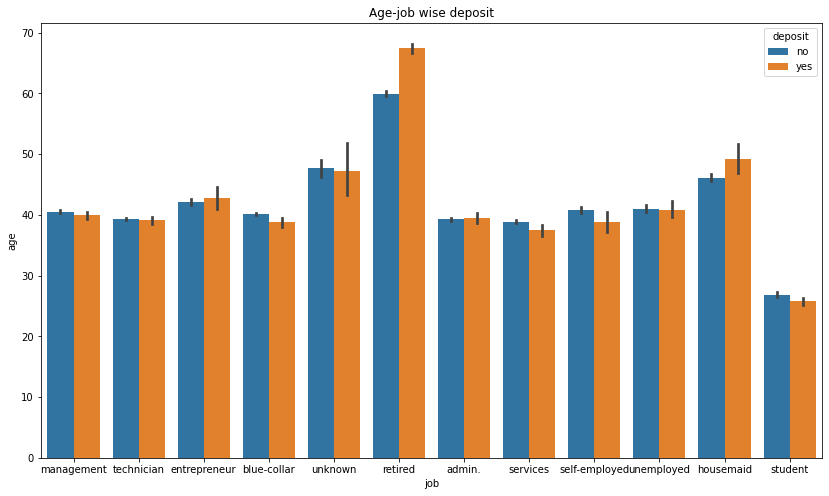

In [246]:
# Age-job wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='job',y='age',hue='deposit')
plt.savefig('age-job wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('Age-job wise deposit')

In [ ]:
1. clients who are retired and housemaids have made more subscription for term deposit.

Text(0.5, 1.0, 'Age-education wise deposit')

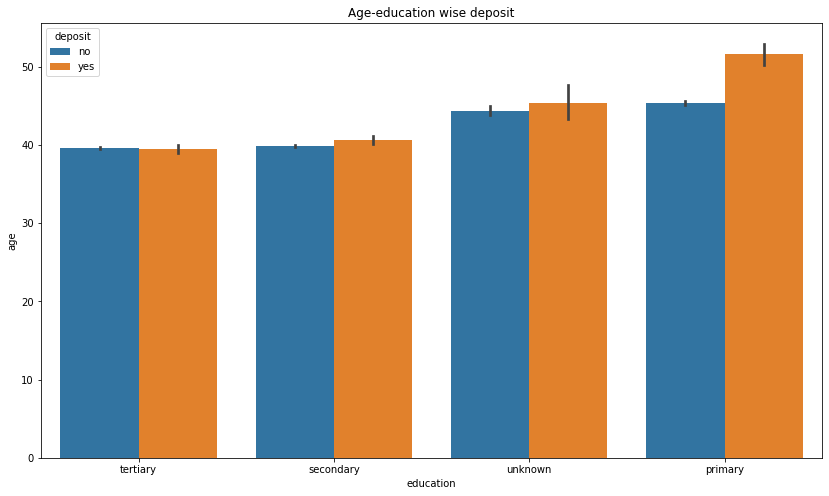

In [243]:
# Age-education wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='education',y='age',hue='deposit')
plt.savefig('age-education wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('Age-education wise deposit')

In [ ]:
1. 

Text(0.5, 1.0, 'Age-marital wise deposit')

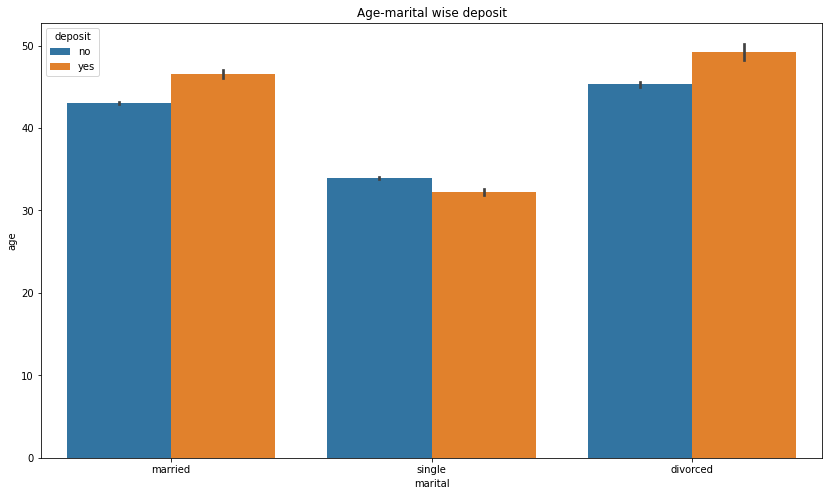

In [244]:
# Age-marital wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='marital',y='age',hue='deposit')
plt.savefig('age-marital wise Iphone.jpg',bbox_inches='tight',dpi=200)
plt.title('Age-marital wise deposit')

Text(0.5, 1.0, 'job wise deposit')

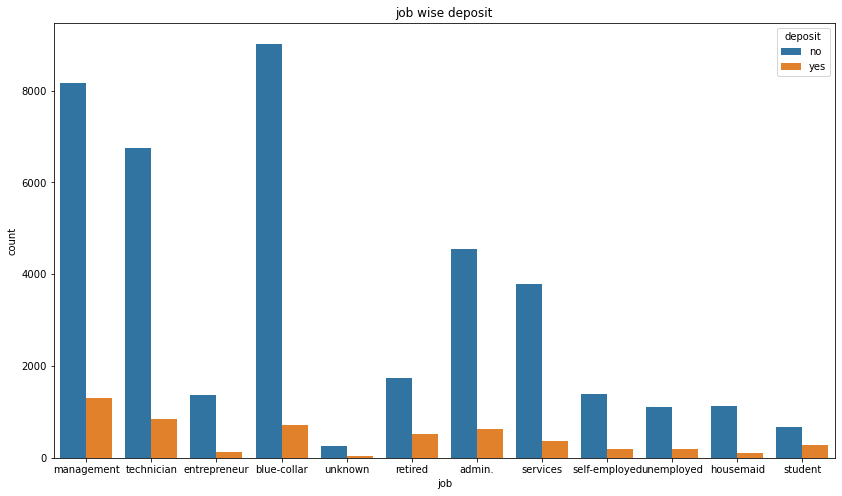

In [249]:
# job wise deposit done
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='job',hue='deposit')
plt.savefig('job wise Iphone.jpg',bbox_inches='tight',dpi=200)
plt.title('job wise deposit')

1. There are large number of clients with manangement and blue-collar job profiles.
2. clients with management job profile has opted for term deposited in large number compared to others.
3. Also, clients with blue-collar job profiles followed by management have not subscribed for deposit in large number.  

Text(0.5, 1.0, 'education wise deposit')

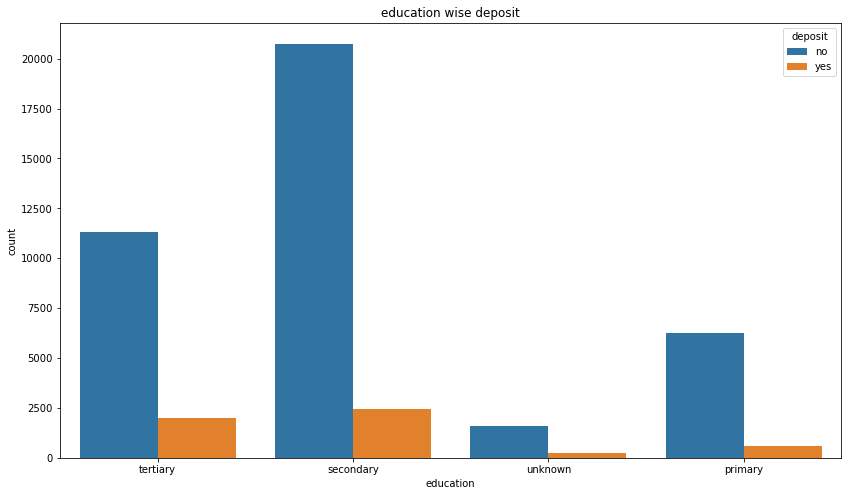

In [250]:
# education wise deposit done
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='education',hue='deposit')
plt.savefig('education wise Iphone.jpg',bbox_inches='tight',dpi=200)
plt.title('education wise deposit')

1. clients with secondary education type are more compared to other.
2. They are the one opted for term deposited in large number. 

Text(0.5, 1.0, 'marital wise deposit')

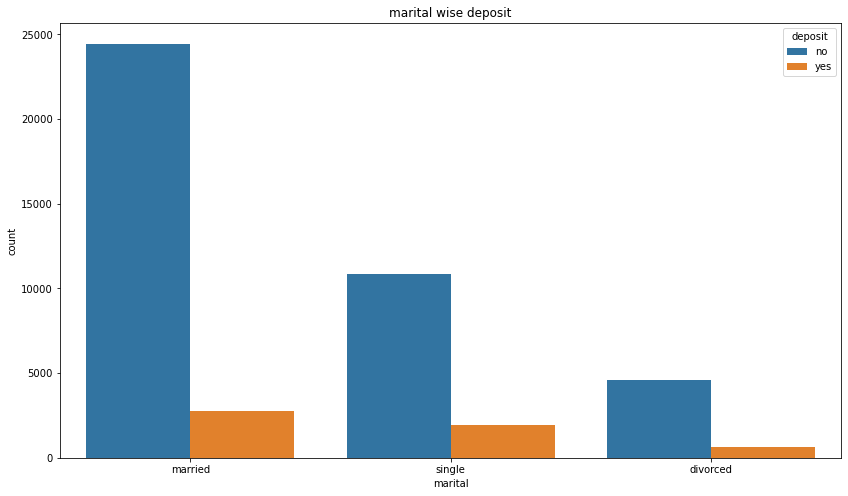

In [251]:
# marital wise deposit done
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='marital',hue='deposit')
plt.savefig('marital wise Iphone.jpg',bbox_inches='tight',dpi=200)
plt.title('marital wise deposit')

In [ ]:
1. Bank has more married clients followed by single and divorced.
2. 

Text(0.5, 1.0, 'job wise balance')

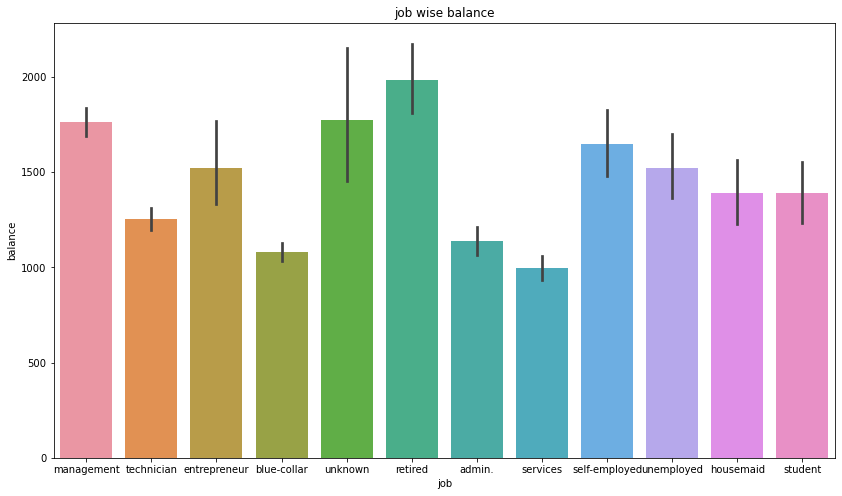

In [256]:
# job wise balance
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='job',y='balance')
plt.savefig('job wise balance.jpg',bbox_inches='tight',dpi=200)
plt.title('job wise balance')

1. clients who are retired have high balance followed by unknown and management.

Text(0.5, 1.0, 'job-balance wise deposit')

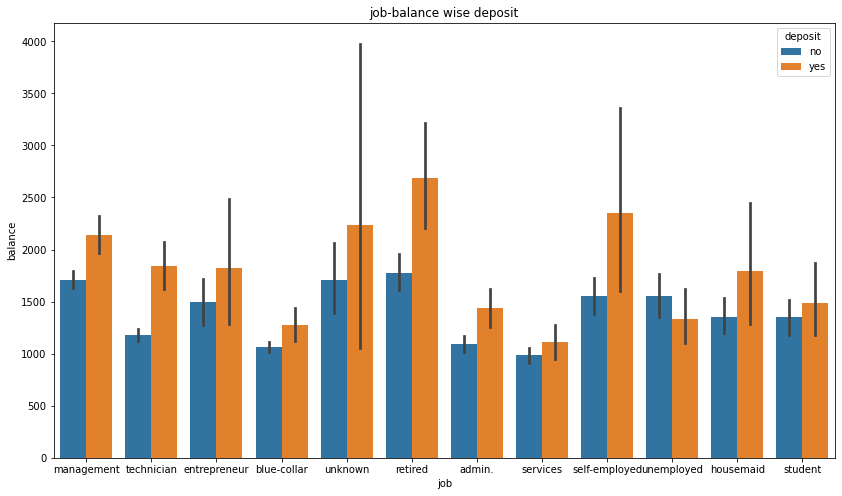

In [255]:
# job-balance wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='job',y='balance',hue='deposit')
plt.savefig('job-balance wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('job-balance wise deposit')

1. clients having more balance has majorly opted for term deposit.

Text(0.5, 1.0, 'marital wise balance')

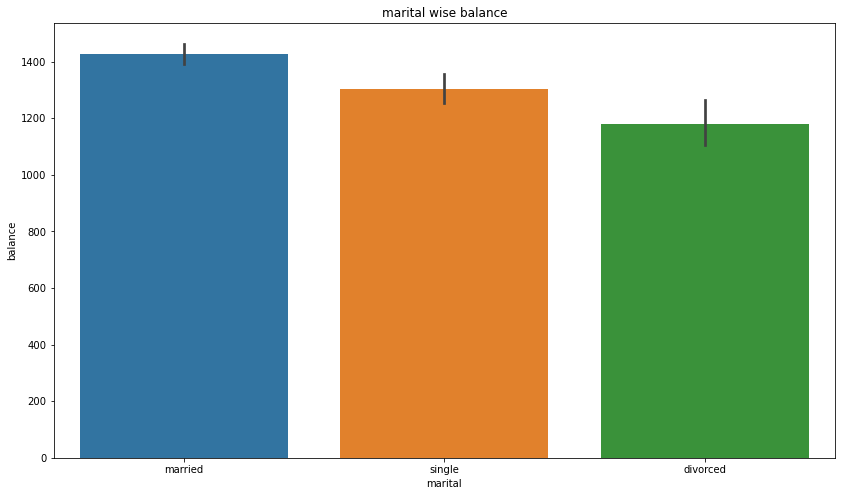

In [258]:
# marital wise balance
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='marital',y='balance')
plt.savefig('marital wise balance.jpg',bbox_inches='tight',dpi=200)
plt.title('marital wise balance')

clients who are married have high balance followed by single and divorced.

Text(0.5, 1.0, 'marital-balance wise deposit')

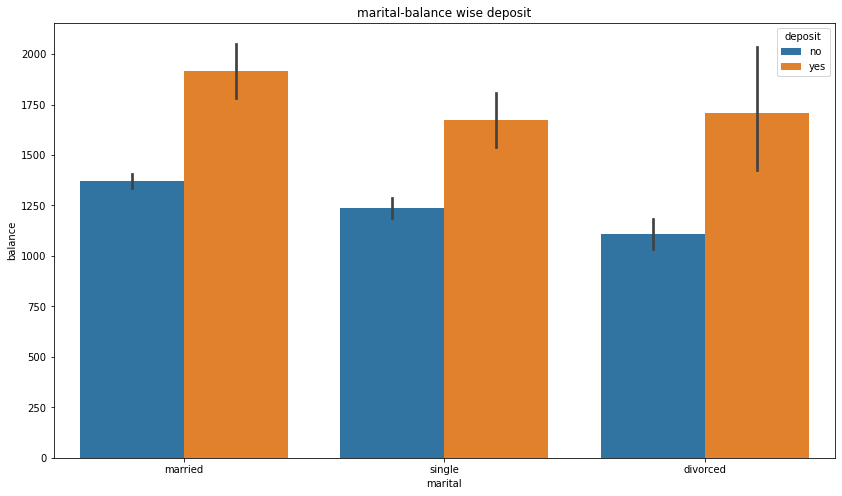

In [259]:
# marital-balance wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='marital',y='balance',hue='deposit')
plt.savefig('marital-balance wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('marital-balance wise deposit')

In [ ]:
1. marital clients having more balance has majorly opted for term deposit.

Text(0.5, 1.0, 'education wise balance')

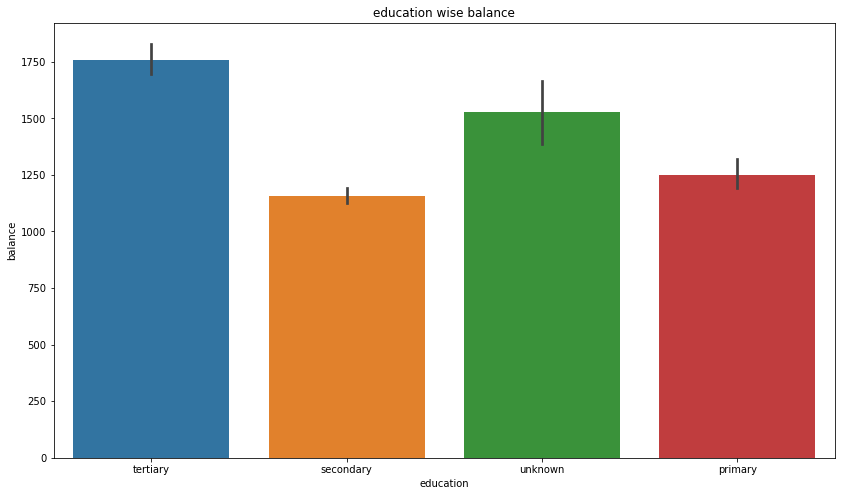

In [260]:
# education wise balance
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='education',y='balance')
plt.savefig('education wise balance.jpg',bbox_inches='tight',dpi=200)
plt.title('education wise balance')

Text(0.5, 1.0, 'education-balance wise deposit')

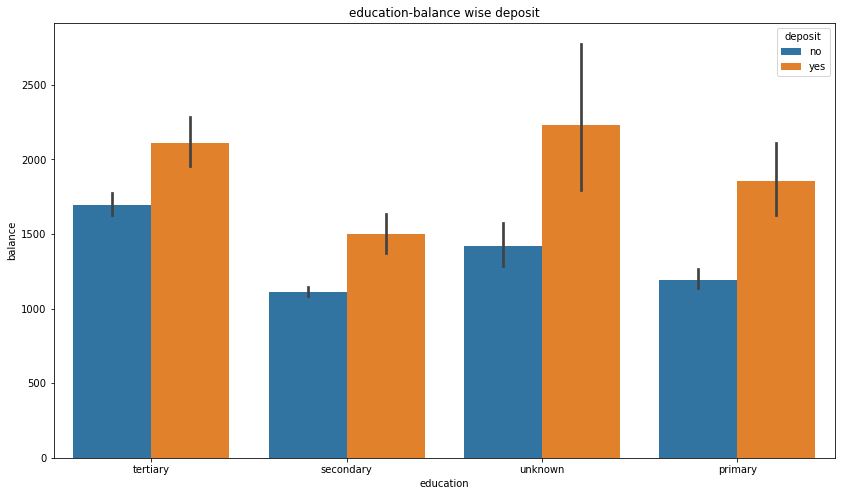

In [261]:
# education-balance wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='education',y='balance',hue='deposit')
plt.savefig('education-balance wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('education-balance wise deposit')

1. tertiary and unknown education type has more balance.
2. they are also the one opted for term deposit in large number compared to others.

Text(0.5, 1.0, 'marital-duration wise deposit')

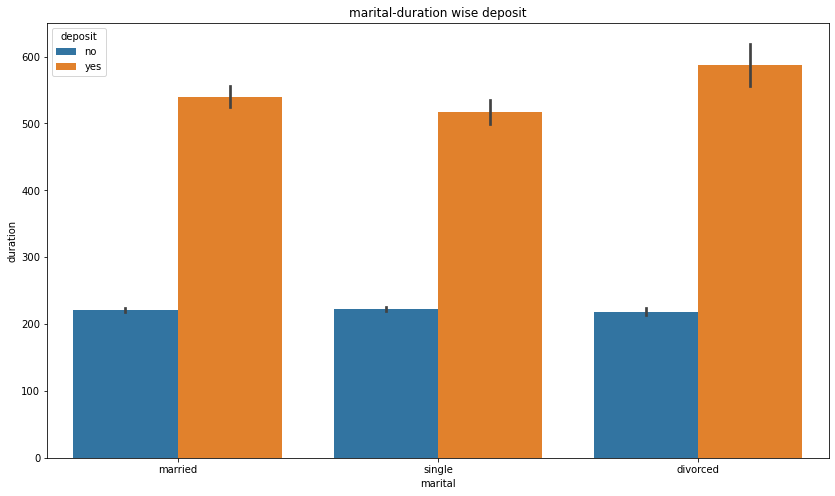

In [266]:
# marital-duration wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='marital',y='duration',hue='deposit')
plt.savefig('marital-duration wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('marital-duration wise deposit')

1. clients with maximum call duration are likely to opt for term deposit.
2. Divorced clients has max call duration follwed by married and single.

Text(0.5, 1.0, 'job-duration wise deposit')

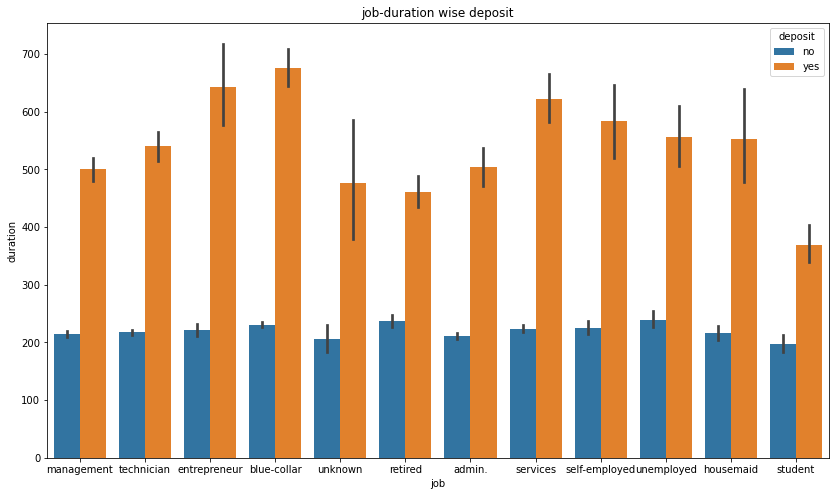

In [267]:
# job-duration wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='job',y='duration',hue='deposit')
plt.savefig('job-duration wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('job-duration wise deposit')

1. clients with maximum call duration are likely to opt for term deposit.
2. clients in blue-collar, entrepreneur and services have max call durations.

Text(0.5, 1.0, 'education-duration wise deposit')

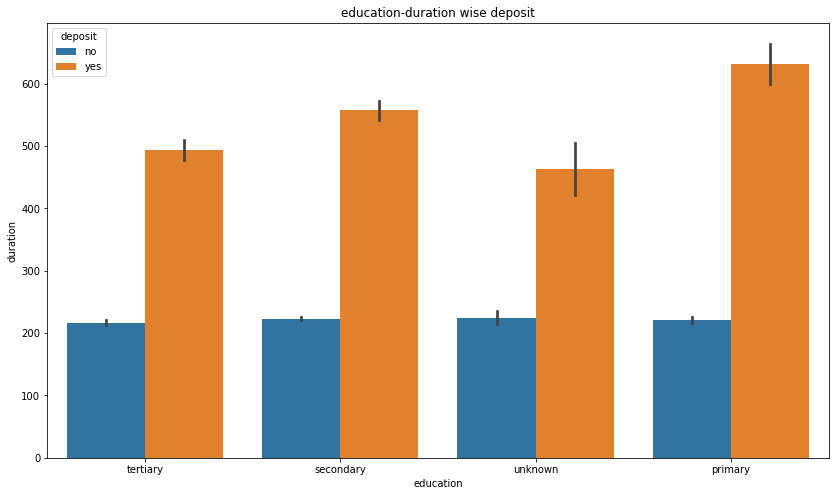

In [268]:
# education-duration wise deposit done
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='education',y='duration',hue='deposit')
plt.savefig('education-duration wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('education-duration wise deposit')

1. clients with maximum call duration are likely to opt for term deposit.
2. clients with primary education type has max call duration followed by secondary, tertiary and unknown.

Text(0.5, 1.0, 'age-duration wise deposit')

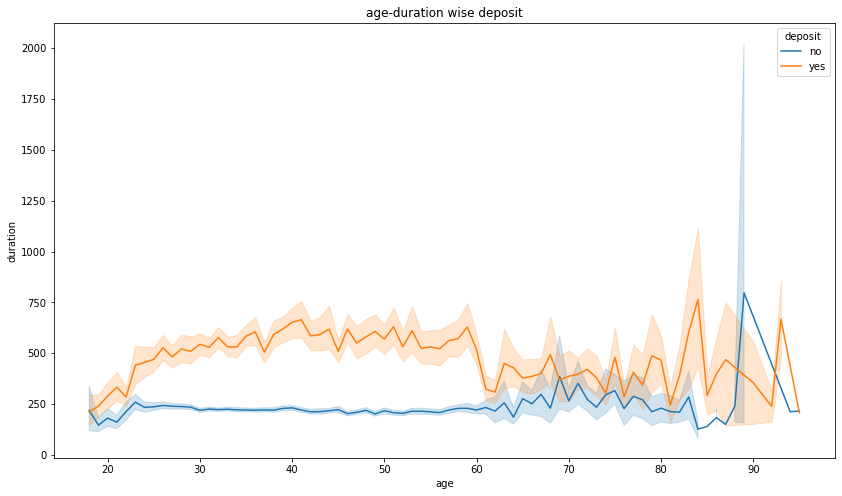

In [269]:
# age-duration wise deposit done
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='age',y='duration',hue='deposit')
plt.savefig('age-duration wise deposit.jpg',bbox_inches='tight',dpi=200)
plt.title('age-duration wise deposit')

1. age group with max call duration are likely to opt for term deposit. 
2. which is not true for the age group above 85 years.

C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

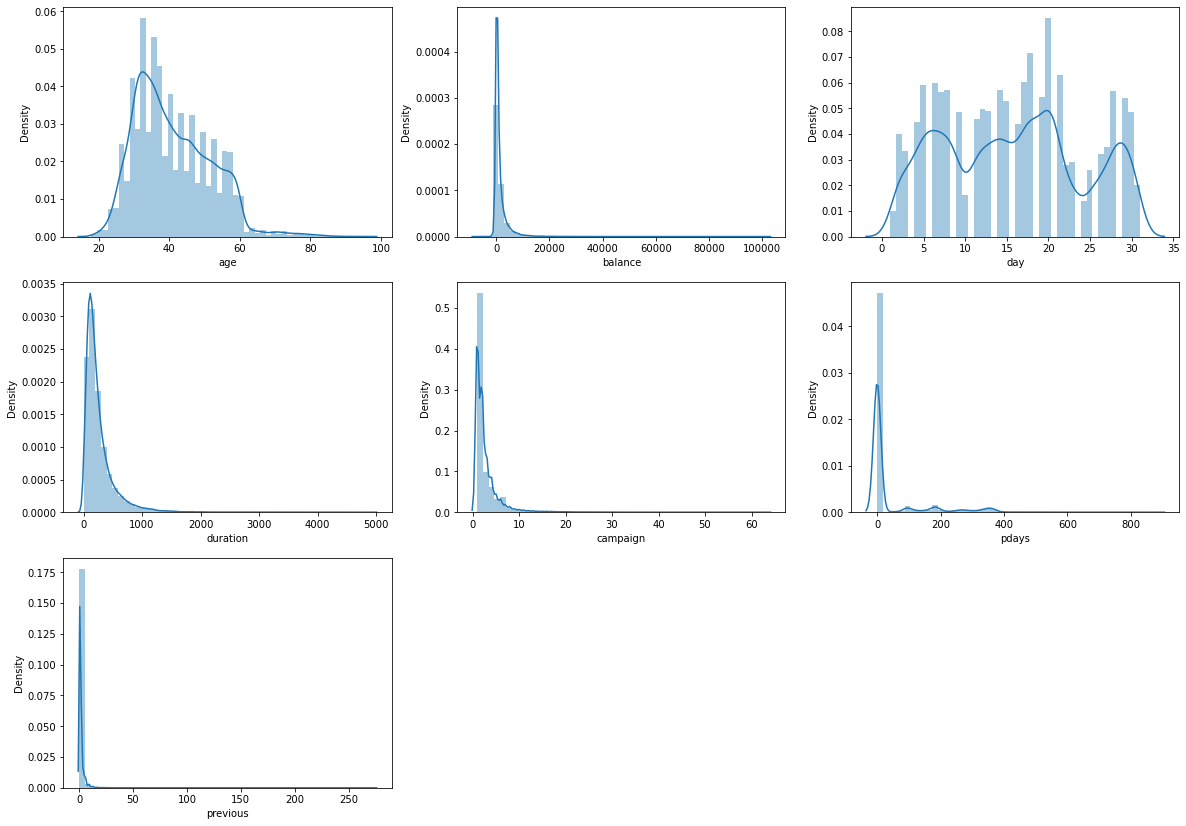

In [101]:
# A univariate distrubution of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.show()

1. Age and day features are distributed normally
2. balance,duration, campaign,pdays,previous are skewed towards left and might have outliers present.

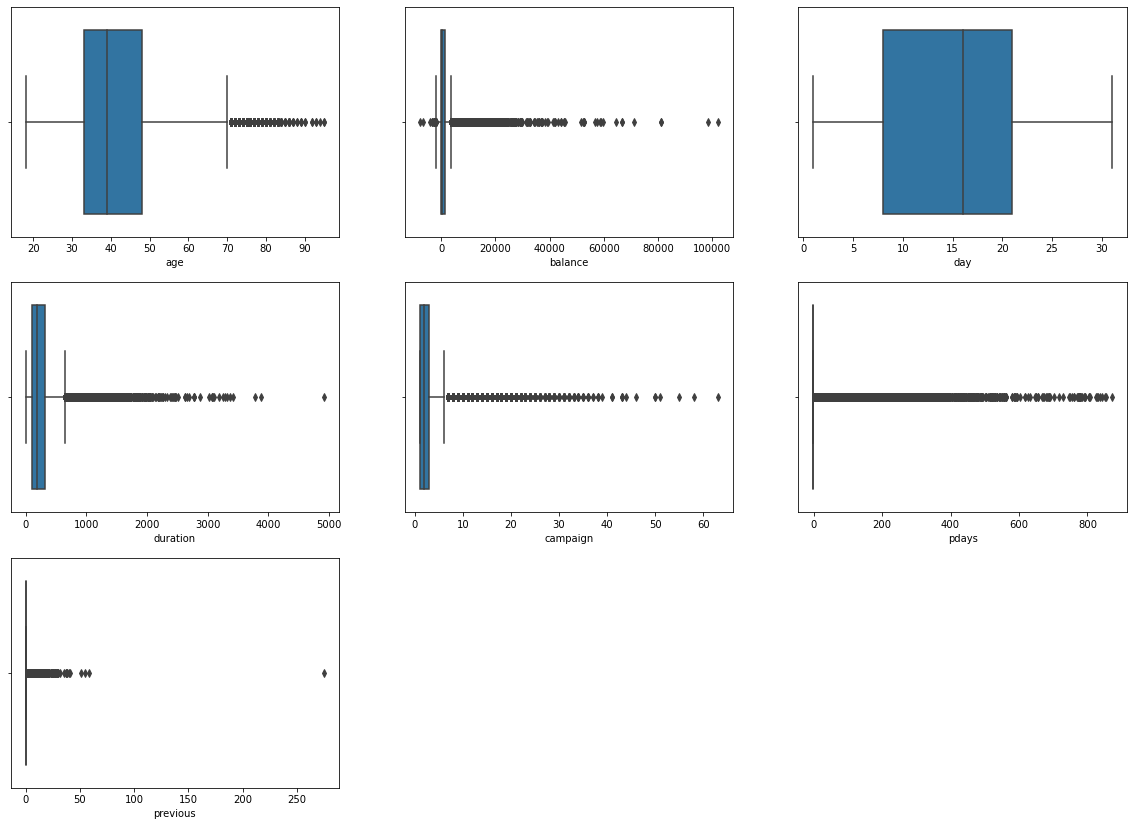

In [102]:
# A univariate distrubution of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.show()

1. all the features have outliers present except day feature.
2. let's remove outliers

In [287]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [177]:
## Let's check for some features that does not play important role
df.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

1. It does not play a vital role because whether the deposit is no or yes, the default feature has shown 90% no.
2. Let's drop default

In [178]:
df.drop('default', axis=1, inplace=True)

In [179]:
df.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

1. more than 75% of data has pdays = -1.
2. It is of no use, Let's drop 

In [180]:
df.drop('pdays', axis=1, inplace=True)

In [181]:
# Age Outliers
df.groupby(['deposit','age']).size()

deposit  age
no       18      5
         19     24
         20     35
         21     57
         22     89
                ..
yes      87      3
         90      2
         92      2
         93      2
         95      1
Length: 148, dtype: int64

1. Age has outliers, but lets keep them.
2. Age lies between 18 to 95

In [182]:
# Balance Outliers
df.groupby(['deposit','balance']).size()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Length: 9258, dtype: int64

1. this feature has aslo have outliers, but they are important.
2. It tells about, clients having negative bank balance have no interest in deposit.
3. Cliets with high balance shown some interest in deposit

In [183]:
# Duration Outliers
df.groupby(['deposit','duration']).size()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Length: 2627, dtype: int64

1. This feature has aslo have outliers, but they are important.
2. Clients having less call duration, have no interest in deposit.
3. Cliets with more call duration balance shown some interest in deposit

In [113]:
# Campaign Outliers
df.groupby(['deposit','campaign']).size()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Length: 70, dtype: int64

<AxesSubplot:xlabel='campaign'>

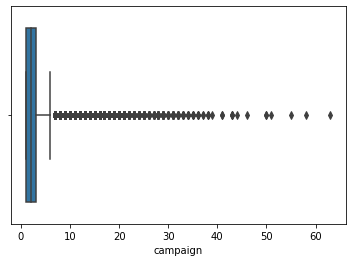

In [114]:
sns.boxplot(x='campaign',data=df)

In [115]:
## Adjust/Remove the Outlier present in campaign coloumn
Q1 = df['campaign'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['campaign'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  1.0
The value of Q3 is:  3.0


In [116]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  2.0
The value of upper threshld is : 4.0


In [119]:
df[df['campaign']>upper_thres]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit


In [120]:
## Will Change the row in order to avoid outlier
df['campaign'] = np.where(df['campaign']>upper_thres,upper_thres,df['campaign']) 

<AxesSubplot:xlabel='campaign'>

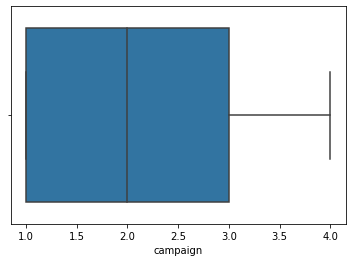

In [121]:
## Box plot of campaign data---------after removing outliers
sns.boxplot(x=df['campaign'])
#plt.savefig('Box plot new campaign.jpg')

<AxesSubplot:xlabel='previous'>

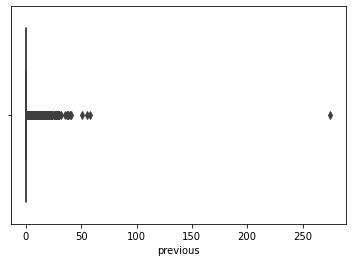

In [122]:
sns.boxplot(x='previous',data=df)

In [123]:
## Adjust/Remove the Outlier present in previous coloumn
Q1 = df['previous'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['previous'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  0.0
The value of Q3 is:  0.0


In [124]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  0.0
The value of upper threshld is : 0.0


In [126]:
df[df['previous']>upper_thres]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
24060,33,admin.,married,tertiary,882,no,no,telephone,21,oct,39,1.0,3,failure,no
24062,42,admin.,single,secondary,-247,yes,yes,telephone,21,oct,519,1.0,1,other,yes
24064,33,services,married,secondary,3444,yes,no,telephone,21,oct,144,1.0,4,failure,yes
24072,36,management,married,tertiary,2415,yes,no,telephone,22,oct,73,1.0,4,other,no
24077,36,management,married,tertiary,0,yes,no,telephone,23,oct,140,1.0,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,1475,yes,no,cellular,16,nov,1166,3.0,12,other,no
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1.0,4,success,yes
45204,73,retired,married,secondary,2850,no,no,cellular,17,nov,300,1.0,8,failure,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,4.0,3,success,yes


In [127]:
## Will Change the row in order to avoid outlier
df['previous'] = np.where(df['previous']>upper_thres,upper_thres,df['previous']) 

<AxesSubplot:xlabel='previous'>

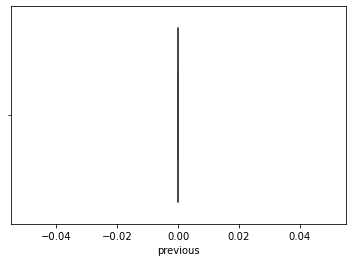

In [128]:
## Box plot of previous data---------after removing outliers
sns.boxplot(x=df['previous'])
#plt.savefig('Box plot new previous.jpg')

Text(0.5, 1.0, 'Deposits')

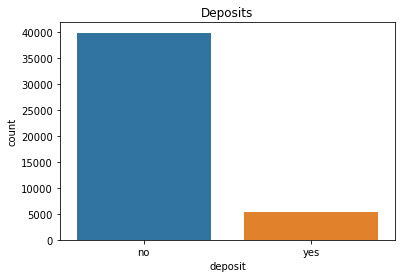

In [129]:
## Number of deposit done by clients
sns.countplot(x='deposit', data=df)
plt.title('Deposits')

In [105]:
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

1. Number of clients don't opted for deposit: 39922
2. Number of clients opted for deposit: 5289

In [184]:
cat_col

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [160]:
## let's change the categorical columns to numeric one
cat_col.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [161]:
#cat_col.drop(['deposit'],axis=1,inplace=True)

In [185]:
# let's also drop contact and month as they does not affect the data
cat_col.drop(['contact','month'],axis=1,inplace=True)

In [163]:
# let's convert bool value features like default, loan, housing into numeric one
cat_col['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [136]:
cat_col['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [188]:
cat_col['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [ ]:
## here the data type of the loan column is object, so that's why we have used str.lower
#cat_col['loan']=np.where(cat_col['loan'].str.lower()=='no',0,1)
#dic = {'yes':1,'no':0}
#cat_col['loan'] = cat_col['loan'].map(dic)
#cat_col['loan'] = cat_col['loan'].map({'yes': 1, 'no': 0}
#cat_col['loan'].value_counts()

In [186]:
# let's convert bool value features like default, loan, housing into numeric one
cat_col['loan'] = cat_col['loan'].replace(to_replace={'yes':1, 'no':0})
cat_col['default'] = cat_col['default'].replace(to_replace={'yes':1, 'no':0})
cat_col['housing'] = cat_col['housing'].replace(to_replace={'yes':1, 'no':0})
cat_col['deposit'] = cat_col['deposit'].replace(to_replace={'yes':1, 'no':0})

In [187]:
cat_col

,job,marital,education,default,housing,loan,poutcome,deposit
0,management,married,tertiary,0,1,0,unknown,0
1,technician,single,secondary,0,1,0,unknown,0
2,entrepreneur,married,secondary,0,1,1,unknown,0
3,blue-collar,married,unknown,0,1,0,unknown,0
4,unknown,single,unknown,0,0,0,unknown,0
...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,0,0,0,unknown,1
45207,retired,divorced,primary,0,0,0,unknown,1
45208,retired,married,secondary,0,0,0,success,1
45209,blue-collar,married,secondary,0,0,0,unknown,0


In [189]:
cat_col_dum = pd.get_dummies(cat_col[['job','marital','education', 'poutcome',]])


In [190]:
cat_col_dum.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [191]:
df1=pd.concat([cat_col,cat_col_dum],axis=1)

In [192]:
df1

,job,marital,education,default,housing,loan,poutcome,deposit,job_admin.,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,management,married,tertiary,0,1,0,unknown,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,technician,single,secondary,0,1,0,unknown,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,entrepreneur,married,secondary,0,1,1,unknown,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,blue-collar,married,unknown,0,1,0,unknown,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,unknown,single,unknown,0,0,0,unknown,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,0,0,0,unknown,1,0,0,...,1,0,0,0,1,0,0,0,0,1
45207,retired,divorced,primary,0,0,0,unknown,1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,retired,married,secondary,0,0,0,success,1,0,0,...,1,0,0,1,0,0,0,0,1,0
45209,blue-collar,married,secondary,0,0,0,unknown,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [193]:
df1.drop(['job','marital','education','poutcome'],axis=1,inplace=True)

In [194]:
df1.head()

,default,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [195]:
num_col

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [202]:
df2=pd.concat([num_col,df1],axis=1)

In [203]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [204]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'deposit', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

----------------sampling the data------------------

In [207]:
x=df2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']]
y=df2['deposit']

In [208]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [209]:
x_sc=sc.fit_transform(x)

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)


In [212]:
x_train.shape,x_test.shape

((36168, 33), (9043, 33))

In [ ]:
-----------model building----------

In [213]:
from sklearn.linear_model import LogisticRegression

In [215]:
lr=LogisticRegression()

In [216]:
lr_fit=lr.fit(x_train,y_train)

------------model prediction-------------

In [217]:
pred=lr_fit.predict(x_test)

In [218]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['actual']=y_test.values

In [223]:
dd

,predicted,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
9038,0,0
9039,0,0
9040,0,0
9041,0,0


-----------Error Calcultions----------------

In [271]:
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

In [276]:
print('Model: Logistic Regression')

print('The accuracy of the model is:',round(accuracy_score(dd['actual'],dd['predicted']),2))
print('The precision of the model is:',round(precision_score(dd['actual'],dd['predicted']),2))
print('The confusion matrix is :',confusion_matrix(dd['actual'],dd['predicted']))
print('The confusion matrix is :\n',classification_report(dd['actual'],dd['predicted']))

Model: Logistic Regression
The accuracy of the model is: 0.9
The precision of the model is: 0.65
The confusion matrix is : [[7817  176]
 [ 727  323]]
The confusion matrix is :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7993
           1       0.65      0.31      0.42      1050

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [ ]:
----------- saving the model-------------

In [227]:
import joblib

In [228]:
filename='Bank_prj_7.sav'

In [230]:
joblib.dump(lr_fit,filename)

['Bank_prj_7.sav']